In [1]:
data = read.csv('Salary_Data.csv')
data[1:5,]

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891


In [4]:
library(caTools)
set.seed(101)
split= sample.split(data$Salary, SplitRatio= 2/3)
training_data = subset(data, split== TRUE)
test_data = subset(data, split== FALSE)

In [5]:
test_data

,YearsExperience,Salary
3,1.5,37731
11,3.9,63218
12,4.0,55794
13,4.0,56957
14,4.1,57081
17,5.1,66029
21,6.8,91738
22,7.1,98273
25,8.7,109431
26,9.0,105582


In [6]:
#Let's train the data
reg = lm(formula= Salary ~ YearsExperience, data= training_data)

In [7]:
summary(reg)


Call:
lm(formula = Salary ~ YearsExperience, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8760.0 -3816.9  -646.1  4584.2 10170.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        28176       2600   10.84 2.56e-09 ***
YearsExperience     9266        429   21.60 2.54e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5780 on 18 degrees of freedom
Multiple R-squared:  0.9628,	Adjusted R-squared:  0.9608 
F-statistic: 466.5 on 1 and 18 DF,  p-value: 2.545e-14


In [8]:
y_pred= predict(reg, newdata = test_data)

In [9]:
# Visualisation
library(ggplot2)

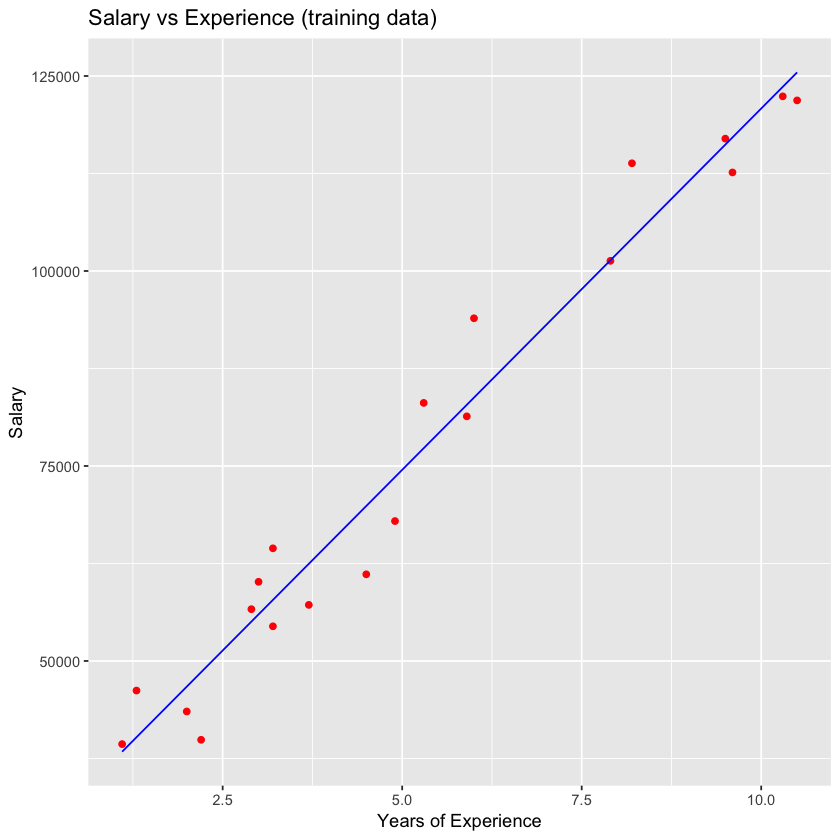

In [11]:
ggplot()+
    geom_point(aes(x= training_data$YearsExperience, y= training_data$Salary),
              color= 'red')+
    geom_line(aes(x = training_data$YearsExperience, y= predict(reg, newdata=training_data)),
             color='blue')+
    ggtitle('Salary vs Experience (training data)')+
    xlab('Years of Experience')+
    ylab('Salary')

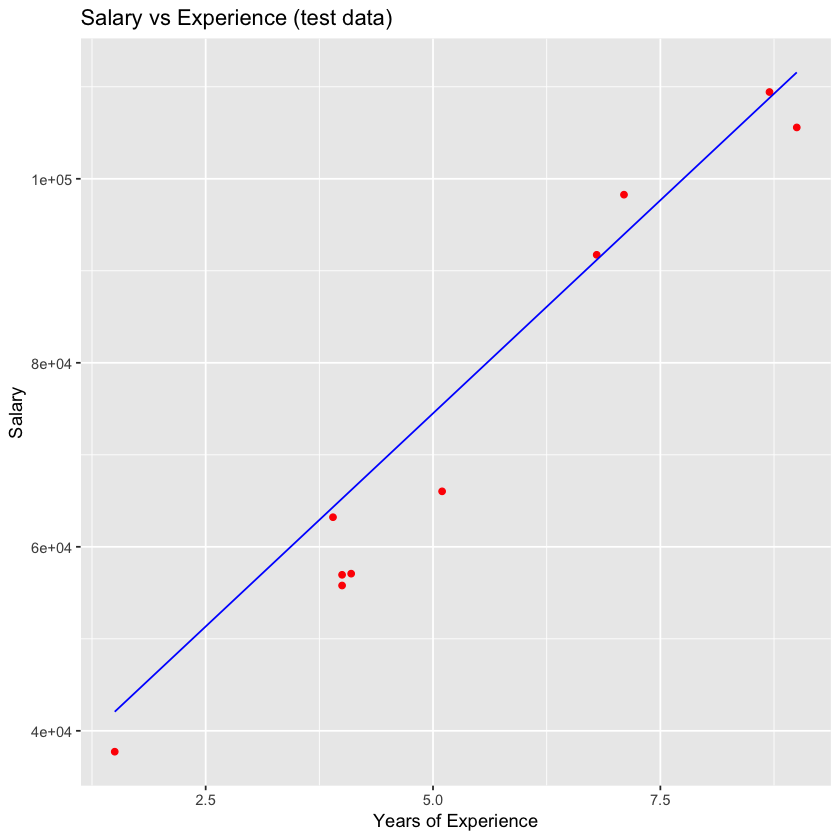

In [12]:
ggplot()+
    geom_point(aes(x= test_data$YearsExperience, y= test_data$Salary),
              color= 'red')+
    geom_line(aes(x = test_data$YearsExperience, y= y_pred),
             color='blue')+
    ggtitle('Salary vs Experience (test data)')+
    xlab('Years of Experience')+
    ylab('Salary')

#### ggplot gives lot more control.